In [7]:
import pandas as pd
import seaborn as sns

In [19]:
df = pd.read_excel('adidas-sales.xlsx', sheet_name='Data Sales Adidas', header=4, index_col=0)
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
NaN,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
NaN,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
NaN,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
NaN,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
NaN,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
NaN,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
NaN,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
NaN,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


### Show the general trends of data and distribution and basic stats per column

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9648 entries, nan to nan
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 1.0+ MB


In [21]:
df.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,2021-05-10 15:20:44.776119296,45.216625,256.930037,93273.437500,34425.244761,0.422991
min,1.128299e+06,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.800000
std,2.636038e+04,NaN,14.705397,214.252030,141916.016727,54193.113713,0.097197


In [22]:
numeric_cols = df.describe().columns
df[numeric_cols].corr()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
Retailer ID,1.000000,0.192523,-0.391684,-0.003194,-0.083580,-0.027137,0.216780
Invoice Date,0.192523,1.000000,0.053903,-0.146083,-0.069728,-0.044229,0.080338
Price per Unit,-0.391684,0.053903,1.000000,0.265869,0.435811,0.394546,-0.137486
Units Sold,-0.003194,-0.146083,0.265869,1.000000,0.913431,0.892379,-0.305479
Total Sales,-0.083580,-0.069728,0.435811,0.913431,1.000000,0.956307,-0.364592
Operating Profit,-0.027137,-0.044229,0.394546,0.892379,0.956307,1.000000,-0.211920
Operating Margin,0.216780,0.080338,-0.137486,-0.305479,-0.364592,-0.211920,1.000000


In [23]:
categorical_cols = [col for col in df.columns if col not in numeric_cols]
categorical_cols

['Retailer', 'Region', 'State', 'City', 'Product', 'Sales Method']

In [25]:
for col in categorical_cols:
    print(f'{col}: {", ".join(df[col].unique())}')
    print()

Retailer: Foot Locker, Walmart, Sports Direct, West Gear, Kohl's, Amazon

Region: Northeast, South, West, Midwest, Southeast

State: New York, Texas, California, Illinois, Pennsylvania, Nevada, Colorado, Washington, Florida, Minnesota, Montana, Tennessee, Nebraska, Alabama, Maine, Alaska, Hawaii, Wyoming, Virginia, Michigan, Missouri, Utah, Oregon, Louisiana, Idaho, Arizona, New Mexico, Georgia, South Carolina, North Carolina, Ohio, Kentucky, Mississippi, Arkansas, Oklahoma, Kansas, South Dakota, North Dakota, Iowa, Wisconsin, Indiana, West Virginia, Maryland, Delaware, New Jersey, Connecticut, Rhode Island, Massachusetts, Vermont, New Hampshire

City: New York, Houston, San Francisco, Los Angeles, Chicago, Dallas, Philadelphia, Las Vegas, Denver, Seattle, Miami, Minneapolis, Billings, Knoxville, Omaha, Birmingham, Portland, Anchorage, Honolulu, Orlando, Albany, Cheyenne, Richmond, Detroit, St. Louis, Salt Lake City, New Orleans, Boise, Phoenix, Albuquerque, Atlanta, Charleston, Charlo

### Show the top selling retailers, by region, to help the company emphasize what brands are excelling in sales and which areas could use some attention

In [26]:
df.groupby(['Product'])[['Price per Unit', 'Units Sold']].mean()

,Price per Unit,Units Sold
Product,,
Men's Apparel,50.321918,190.960772
Men's Athletic Footwear,43.779503,270.513043
Men's Street Footwear,44.236646,368.521739
Women's Apparel,51.600746,269.792910
Women's Athletic Footwear,41.112702,197.531756
Women's Street Footwear,40.252488,243.948383


<Axes: xlabel='Price per Unit', ylabel='Total Sales'>

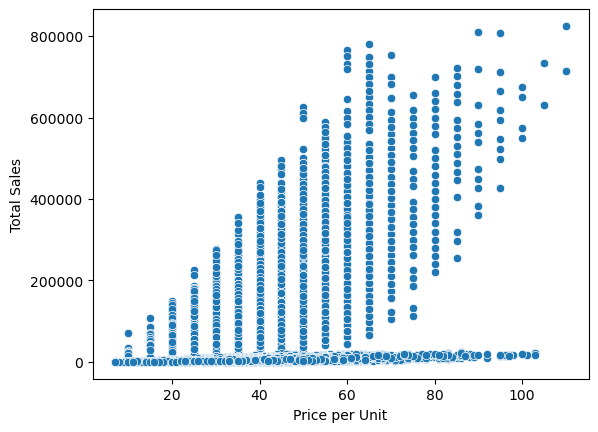

In [27]:
sns.scatterplot(data=df, x='Price per Unit', y='Total Sales')

### Show the top selling retailers, by region, to help the company emphasize what brands are excelling in sales and which areas could use some attention 

<Axes: xlabel='Retailer', ylabel='Total Sales'>

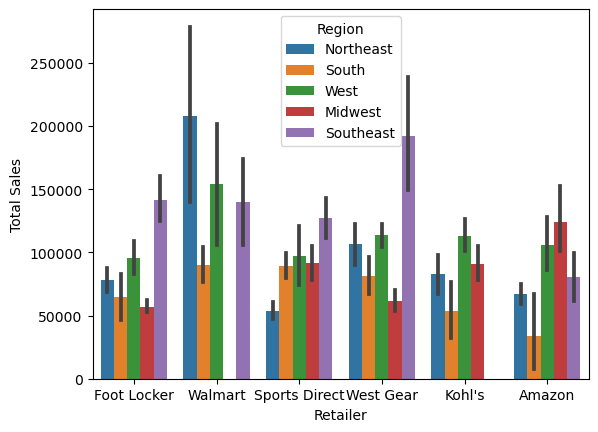

In [28]:
sns.barplot(data=df, x='Retailer', y='Total Sales', hue='Region')

### Bring a sense of how customers are buying with the breakdown of Sales Method

<Axes: xlabel='Sales Method', ylabel='Units Sold'>

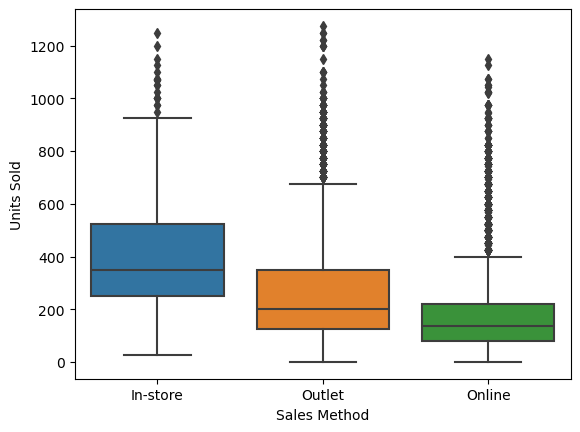

In [29]:
sns.boxplot(data=df, x='Sales Method', y='Units Sold')

<Axes: xlabel='Sales Method', ylabel='count'>

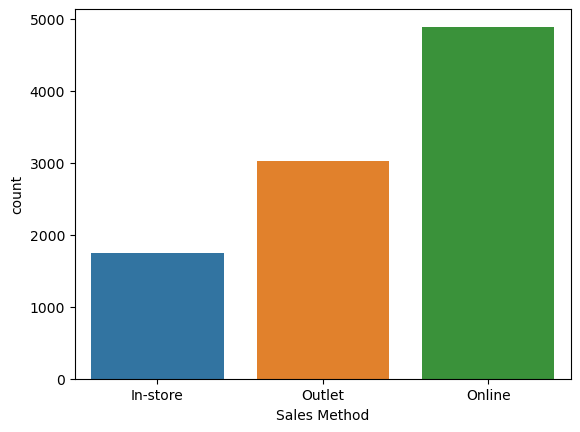

In [30]:
sns.countplot(data=df, x='Sales Method')

### Show the top 10 cities for Operating Profit

In [31]:
cities_by_profit = df.groupby(['City'])['Operating Profit'].mean().sort_values(ascending=False)

In [32]:
cities_by_profit[:10]

City
Miami            84504.299375
Charlotte        67752.936597
Albany           65485.075764
New York         64351.727593
Detroit          56499.264028
Charleston       54191.632326
Denver           53566.359931
Columbus         52283.611736
Seattle          48551.410625
San Francisco    47482.636852
Name: Operating Profit, dtype: float64

### Show the bottom 5 cities for Operating Profit

In [33]:
cities_by_profit[-5:]

City
Des Moines        18439.009514
Salt Lake City    17932.542130
Omaha             16940.822292
Boston            15527.203102
Providence        14101.005833
Name: Operating Profit, dtype: float64